In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import sklearn.metrics as metrics

In [2]:
# ---------- HyperParameters -----------
BATCH_SIZE = 32
lr = 0.001
epochs_n = 5


In [3]:
# transformations
transform = transforms.Compose([transforms.ToTensor()])


In [4]:
# download the training and validation dataset
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True,num_workers=4)

testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True,num_workers=4)


In [5]:
len(trainset), len(testset)

(60000, 10000)

In [6]:
# (((W - K + 2P)/S) + 1)
#     Here W = Input size
#     K = Filter size
#     S = Stride
#     P = Padding 

class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten (view) => 32 x (32*26*26)
        x = x.flatten(start_dim=1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        #logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out
    
    

In [7]:
# Train the model, print out training accuracy
model = MNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)



In [8]:
for epoch in range(epochs_n):
    train_running_loss = 0.0
    train_acc = 0.0

    # training step
    for i, (images, labels) in enumerate(trainloader):
        
        # forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        # update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += (torch.argmax(logits, 1).flatten() == labels).type(torch.float).mean().item()
    print(f'Epoch: {epoch:3d} | {train_running_loss / i:4f} | {train_acc /i:4f}')

Epoch:   0 | 1.535187 | 0.931980
Epoch:   1 | 1.488477 | 0.975437
Epoch:   2 | 1.480838 | 0.982757
Epoch:   3 | 1.476631 | 0.986960
Epoch:   4 | 1.474187 | 0.988677


In [9]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    outputs = model(images)
    print(f'Labels: {labels}')
    preds = torch.argmax(outputs, 1).flatten()
    print(f'Preds : {preds}')
    test_acc += (preds == labels).type(torch.float).mean().item()
    pscore = metrics.precision_score(preds.numpy(), labels.numpy(), average='micro')
    rscore = metrics.recall_score(preds.numpy(),labels.numpy(), average='micro')
    print(f'Precision Score:{pscore}, Recall Score:{rscore}')
print(f'Test Accuracy: {test_acc /i :.4f}')

Labels: tensor([8, 5, 1, 5, 8, 2, 9, 2, 1, 2, 6, 5, 0, 1, 0, 5, 2, 6, 2, 3, 4, 1, 2, 7,
        3, 0, 1, 8, 5, 1, 3, 8])
Preds : tensor([8, 5, 1, 5, 8, 2, 9, 2, 1, 2, 6, 5, 0, 1, 0, 5, 2, 6, 2, 3, 4, 1, 2, 7,
        3, 0, 1, 8, 5, 1, 3, 8])
Precision Score:1.0, Recall Score:1.0
Labels: tensor([9, 2, 6, 3, 2, 6, 0, 8, 5, 5, 1, 8, 7, 7, 6, 1, 3, 4, 6, 7, 6, 8, 4, 8,
        4, 3, 3, 1, 0, 8, 5, 6])
Preds : tensor([8, 2, 6, 3, 2, 6, 0, 8, 5, 5, 1, 8, 7, 7, 6, 1, 3, 4, 6, 7, 6, 8, 4, 8,
        4, 3, 3, 1, 0, 8, 5, 6])
Precision Score:0.96875, Recall Score:0.96875
Labels: tensor([0, 6, 1, 3, 6, 3, 4, 9, 1, 0, 8, 7, 0, 5, 9, 1, 9, 6, 4, 0, 9, 9, 1, 3,
        4, 5, 4, 5, 2, 7, 1, 5])
Preds : tensor([0, 6, 1, 3, 6, 3, 4, 9, 1, 0, 8, 7, 0, 5, 9, 1, 9, 6, 4, 0, 9, 9, 1, 3,
        4, 6, 4, 5, 2, 7, 1, 5])
Precision Score:0.96875, Recall Score:0.96875
Labels: tensor([1, 7, 1, 9, 9, 5, 1, 8, 4, 5, 6, 0, 1, 5, 8, 1, 3, 9, 2, 1, 4, 0, 5, 0,
        2, 8, 2, 0, 7, 8, 7, 6])
Preds : tensor([1, 7, 1

In [10]:
# Setup
# PyTorch Geometric

# !brew install ngrok/ngrok/ngrok
# !pip install --verbose --no-cache-dir torch-scatter
# !pip install --verbose --no-cache-dir torch-sparse
# !pip install --verbose --no-cache-dir torch-cluster
# !pip install torch-geometric tensorboardX

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch.optim as optim

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader

import torch_geometric.transforms as T
from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [12]:
class GNNStack(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, task='node'):
        super(GNNStack, self).__init__()
        self.task = task
        self.convs = nn.ModuleList()
        self.convs.append(self.build_conv_model(input_dim, hidden_dim))
        self.lns = nn.ModuleList()
        self.lns.append(nn.LayerNorm(hidden_dim))
        self.lns.append(nn.LayerNorm(hidden_dim))
        for l in range(2):
            self.convs.append(self.build_conv_model(hidden_dim, hidden_dim))

        # post-message-passing
        self.post_mp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim), nn.Dropout(0.25), 
            nn.Linear(hidden_dim, output_dim))
        if not (self.task == 'node' or self.task == 'graph'):
            raise RuntimeError('Unknown task.')

        self.dropout = 0.25
        self.num_layers = 3

    def build_conv_model(self, input_dim, hidden_dim):
        # refer to pytorch geometric nn module for different implementation of GNNs.
        if self.task == 'node':
            return pyg_nn.GCNConv(input_dim, hidden_dim)
        else:
            return pyg_nn.GINConv(nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                  nn.ReLU(), nn.Linear(hidden_dim, hidden_dim)))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        if data.num_node_features == 0:
          x = torch.ones(data.num_nodes, 1)

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            emb = x
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            if not i == self.num_layers - 1:
                x = self.lns[i](x)

        if self.task == 'graph':
            x = pyg_nn.global_mean_pool(x, batch)

        x = self.post_mp(x)

        return emb, F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)

In [13]:
class CustomConv(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(CustomConv, self).__init__(aggr='add')  # "Add" aggregation.
        self.lin = nn.Linear(in_channels, out_channels)
        self.lin_self = nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Add self-loops to the adjacency matrix.
        edge_index, _ = pyg_utils.remove_self_loops(edge_index)

        # Transform node feature matrix.
        self_x = self.lin_self(x)
        #x = self.lin(x)

        return self_x + self.propagate(edge_index, size=(x.size(0), x.size(0)), x=self.lin(x))

    def message(self, x_i, x_j, edge_index, size):
        # Compute messages
        # x_j has shape [E, out_channels]

        row, col = edge_index
        deg = pyg_utils.degree(row, size[0], dtype=x_j.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        return x_j

    def update(self, aggr_out):
        # aggr_out has shape [N, out_channels]
        return aggr_out

In [14]:
def train(dataset, task, writer):
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=64, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=64, shuffle=True)
    else:
        test_loader = loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # build model
    model = GNNStack(max(dataset.num_node_features, 1), 32, dataset.num_classes, task=task)
    opt = optim.Adam(model.parameters(), lr=0.01)
    
    # train
    for epoch in range(200):
        total_loss = 0
        model.train()
        for batch in loader:
            #print(batch.train_mask, '----')
            opt.zero_grad()
            embedding, pred = model(batch)
            label = batch.y
            if task == 'node':
                pred = pred[batch.train_mask]
                label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)
        writer.add_scalar("loss", total_loss, epoch)

        if epoch % 10 == 0:
            test_acc = test(test_loader, model)
            print("Epoch {}. Loss: {:.4f}. Test accuracy: {:.4f}".format(
                epoch, total_loss, test_acc))
            writer.add_scalar("test accuracy", test_acc, epoch)

    return model


In [15]:
def test(loader, model, is_validation=False):
    model.eval()

    correct = 0
    for data in loader:
        with torch.no_grad():
            emb, pred = model(data)
            pred = pred.argmax(dim=1)
            label = data.y

        if model.task == 'node':
            mask = data.val_mask if is_validation else data.test_mask
            # node classification: only evaluate on nodes in test set
            pred = pred[mask]
            label = data.y[mask]
            
        correct += pred.eq(label).sum().item()
    
    if model.task == 'graph':
        total = len(loader.dataset) 
    else:
        total = 0
        for data in loader.dataset:
            total += torch.sum(data.test_mask).item()
    return correct / total

In [20]:
%load_ext tensorboard
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format("./log")
)


TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.11.2 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


In [25]:
get_ipython().system_raw('ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://fcc5-50-35-79-116.ngrok.io


Your account is limited to 1 simultaneous ngrok agent session.
Active ngrok agent sessions in region 'us':
  - ts_2L1v4HSap2zlfJMqGKfHFzIc5Gt (50.35.79.116)

ERR_NGROK_108



In [26]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
dataset = dataset.shuffle()
task = 'graph'

model = train(dataset, task, writer)

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!
/Users/ajithj/mambaforge/envs/DLwithTorch/lib/python3.10/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0. Loss: 1.8075. Test accuracy: 0.1500
Epoch 10. Loss: 1.6926. Test accuracy: 0.2083
Epoch 20. Loss: 1.7159. Test accuracy: 0.2500
Epoch 30. Loss: 1.6874. Test accuracy: 0.2250
Epoch 40. Loss: 1.6553. Test accuracy: 0.2667
Epoch 50. Loss: 1.6645. Test accuracy: 0.2583
Epoch 60. Loss: 1.6314. Test accuracy: 0.2167
Epoch 70. Loss: 1.6294. Test accuracy: 0.2417
Epoch 80. Loss: 1.6218. Test accuracy: 0.2750
Epoch 90. Loss: 1.6192. Test accuracy: 0.2667
Epoch 100. Loss: 1.6090. Test accuracy: 0.2333
Epoch 110. Loss: 1.5991. Test accuracy: 0.2667
Epoch 120. Loss: 1.5884. Test accuracy: 0.2333
Epoch 130. Loss: 1.5837. Test accuracy: 0.2667
Epoch 140. Loss: 1.5517. Test accuracy: 0.2750
Epoch 150. Loss: 1.5664. Test accuracy: 0.2583
Epoch 160. Loss: 1.5842. Test accuracy: 0.2667
Epoch 170. Loss: 1.5222. Test accuracy: 0.2750
Epoch 180. Loss: 1.5241. Test accuracy: 0.2917
Epoch 190. Loss: 1.5337. Test accuracy: 0.2417


In [27]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = Planetoid(root='/tmp/cora', name='cora')
task = 'node'

model = train(dataset, task, writer)

Processing...
Done!
/Users/ajithj/mambaforge/envs/DLwithTorch/lib/python3.10/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0. Loss: 1.9647. Test accuracy: 0.2430
Epoch 10. Loss: 0.4018. Test accuracy: 0.7240
Epoch 20. Loss: 0.0181. Test accuracy: 0.7640
Epoch 30. Loss: 0.1350. Test accuracy: 0.7270
Epoch 40. Loss: 0.0195. Test accuracy: 0.7430
Epoch 50. Loss: 0.0116. Test accuracy: 0.7560
Epoch 60. Loss: 0.0039. Test accuracy: 0.7230
Epoch 70. Loss: 0.0375. Test accuracy: 0.7540
Epoch 80. Loss: 0.0044. Test accuracy: 0.7240
Epoch 90. Loss: 0.0124. Test accuracy: 0.7680
Epoch 100. Loss: 0.0016. Test accuracy: 0.7580
Epoch 110. Loss: 0.0214. Test accuracy: 0.7430
Epoch 120. Loss: 0.0042. Test accuracy: 0.7670
Epoch 130. Loss: 0.0057. Test accuracy: 0.7800
Epoch 140. Loss: 0.0004. Test accuracy: 0.7710
Epoch 150. Loss: 0.0004. Test accuracy: 0.7650
Epoch 160. Loss: 0.0004. Test accuracy: 0.7590
Epoch 170. Loss: 0.0113. Test accuracy: 0.7650
Epoch 180. Loss: 0.2237. Test accuracy: 0.7630
Epoch 190. Loss: 0.0026. Test accuracy: 0.7550


/Users/ajithj/mambaforge/envs/DLwithTorch/lib/python3.10/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


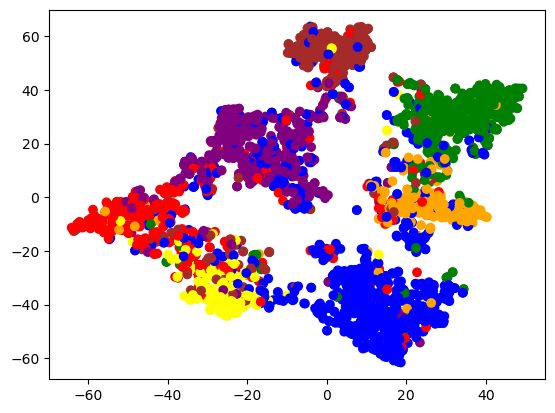

In [29]:
color_list = ["red", "orange", "green", "blue", "purple", "brown", "yellow", "cyan"]

loader = DataLoader(dataset, batch_size=64, shuffle=True)
embs = []
colors = []
for batch in loader:
    emb, pred = model(batch)
    embs.append(emb)
    colors += [color_list[y] for y in batch.y]
embs = torch.cat(embs, dim=0)

xs, ys = zip(*TSNE().fit_transform(embs.detach().numpy()))
plt.scatter(xs, ys, color=colors)